In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from __future__ import absolute_import, division, print_function
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
import seaborn as sns
import mpld3
import numpy as np
import pandas as pd
import os, sys
import warnings

from urllib.request import urlopen
from IPython.display import HTML

from ipywidgets import interactive, FloatSlider

warnings.filterwarnings('always')

In [ ]:
from matplotlib.patches import Wedge
plt.rcParams['figure.figsize'] = (8, 8)

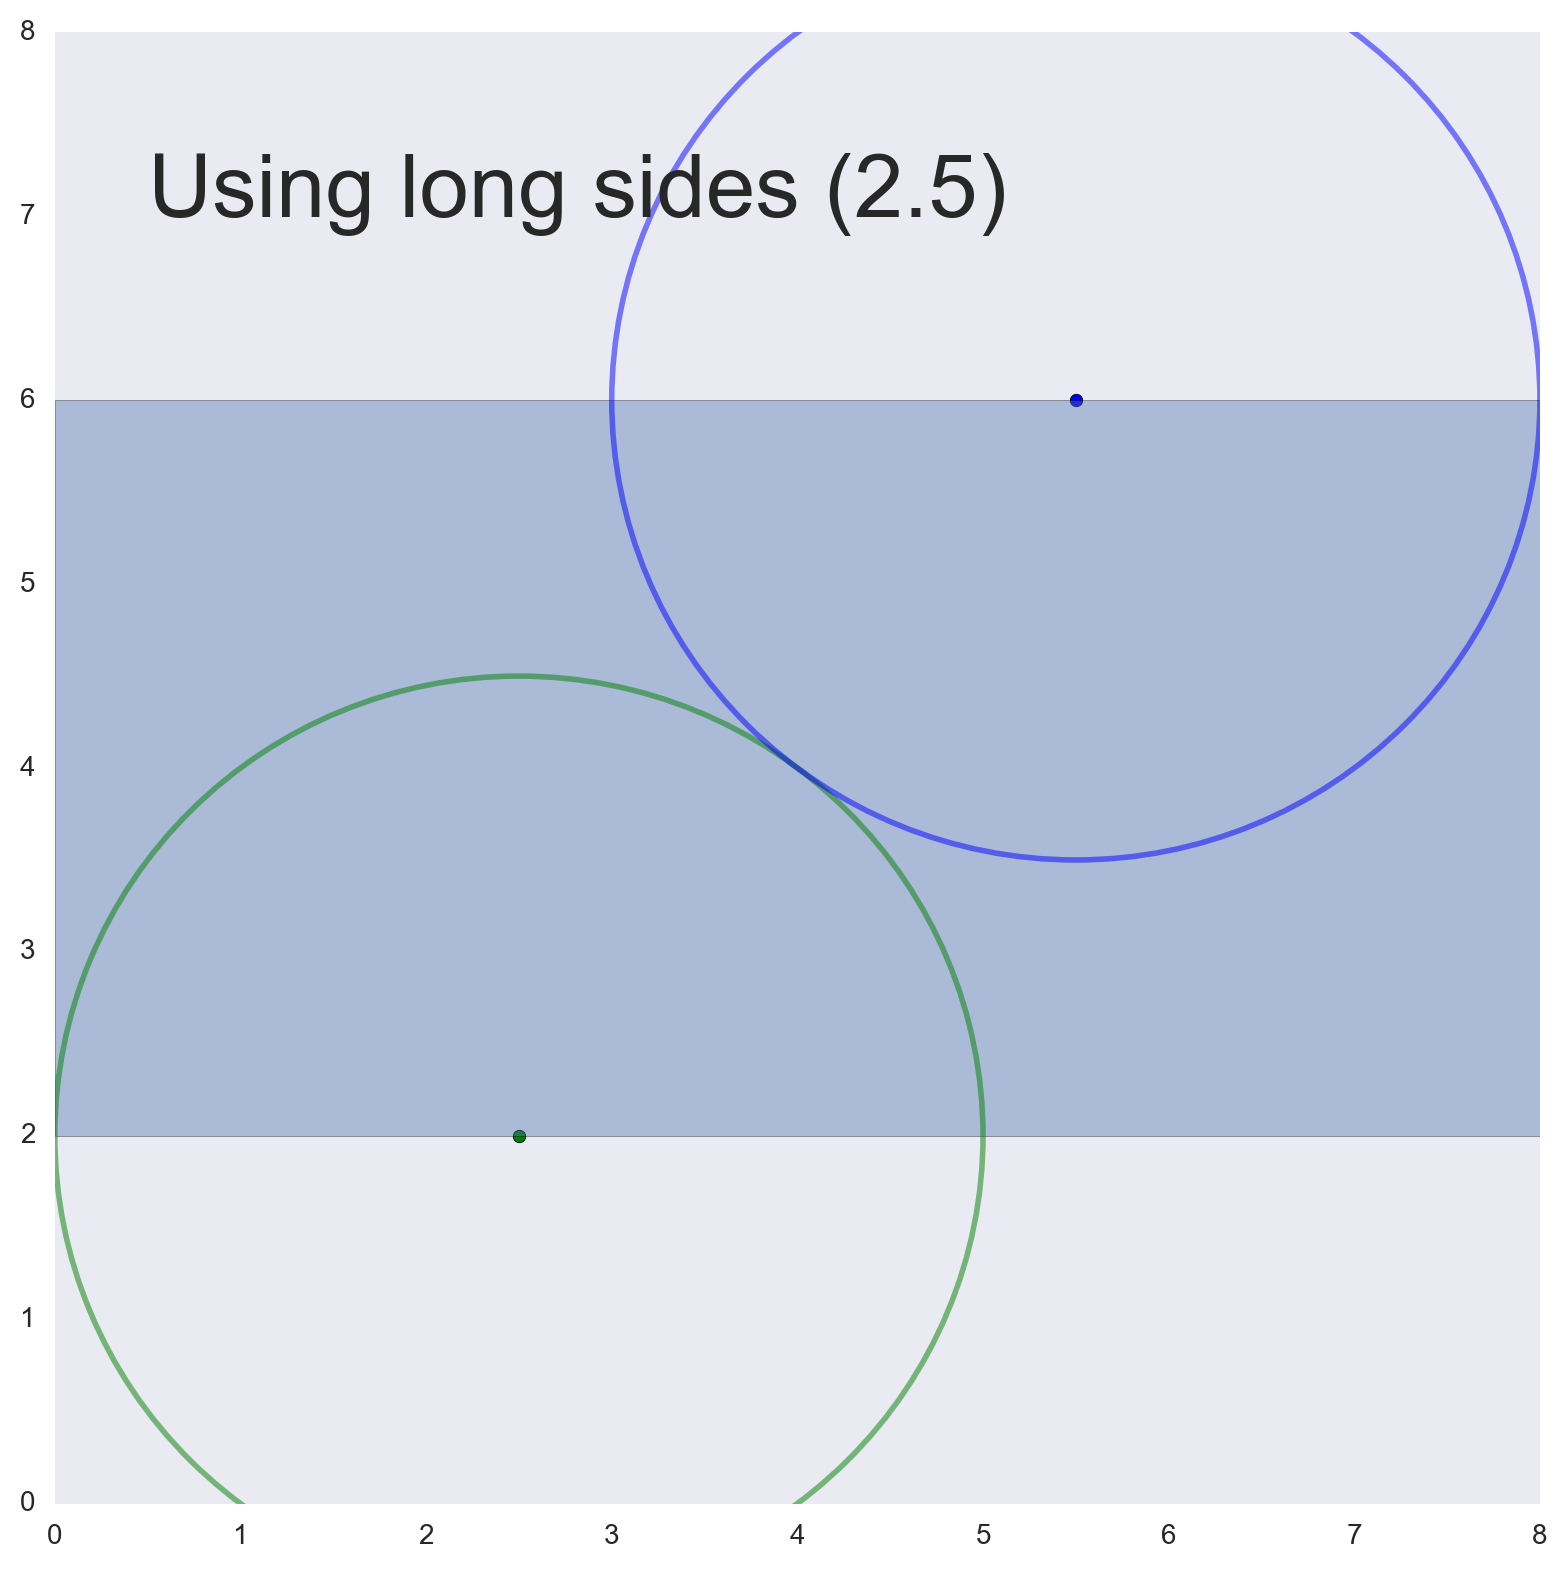

In [3]:
def plot_circles(distance_from_side=2.5):
    fig=plt.figure(1)
    plt.axis([0,8,0,8])
    plt.grid(b=None, )
    ax=fig.add_subplot(1,1,1)
    rect = plt.Rectangle((0, 2), 8, 4, alpha=0.4)
    ax.add_patch(rect)
    circ=plt.Circle((distance_from_side, 2.0), radius=distance_from_side,
                    lw=2.0, color='g', alpha=0.5, fill=False,)
    ax.add_patch(circ)
    circ2=plt.Circle((8 - distance_from_side, 6.0), radius=distance_from_side,
                     lw=2.0, color='b', alpha=0.5, fill=False,)
    ax.add_patch(circ2)
    ax.set_ylim(0, 8)
    plt.scatter(distance_from_side, 2.0, c='g')
    plt.scatter(8 - distance_from_side, 6.0, c='b')
    ax.text(.5, 7, "Using long sides (2.5)", zorder=2, fontdict={'size':32})
    fig.tight_layout()
    
plot_circles()

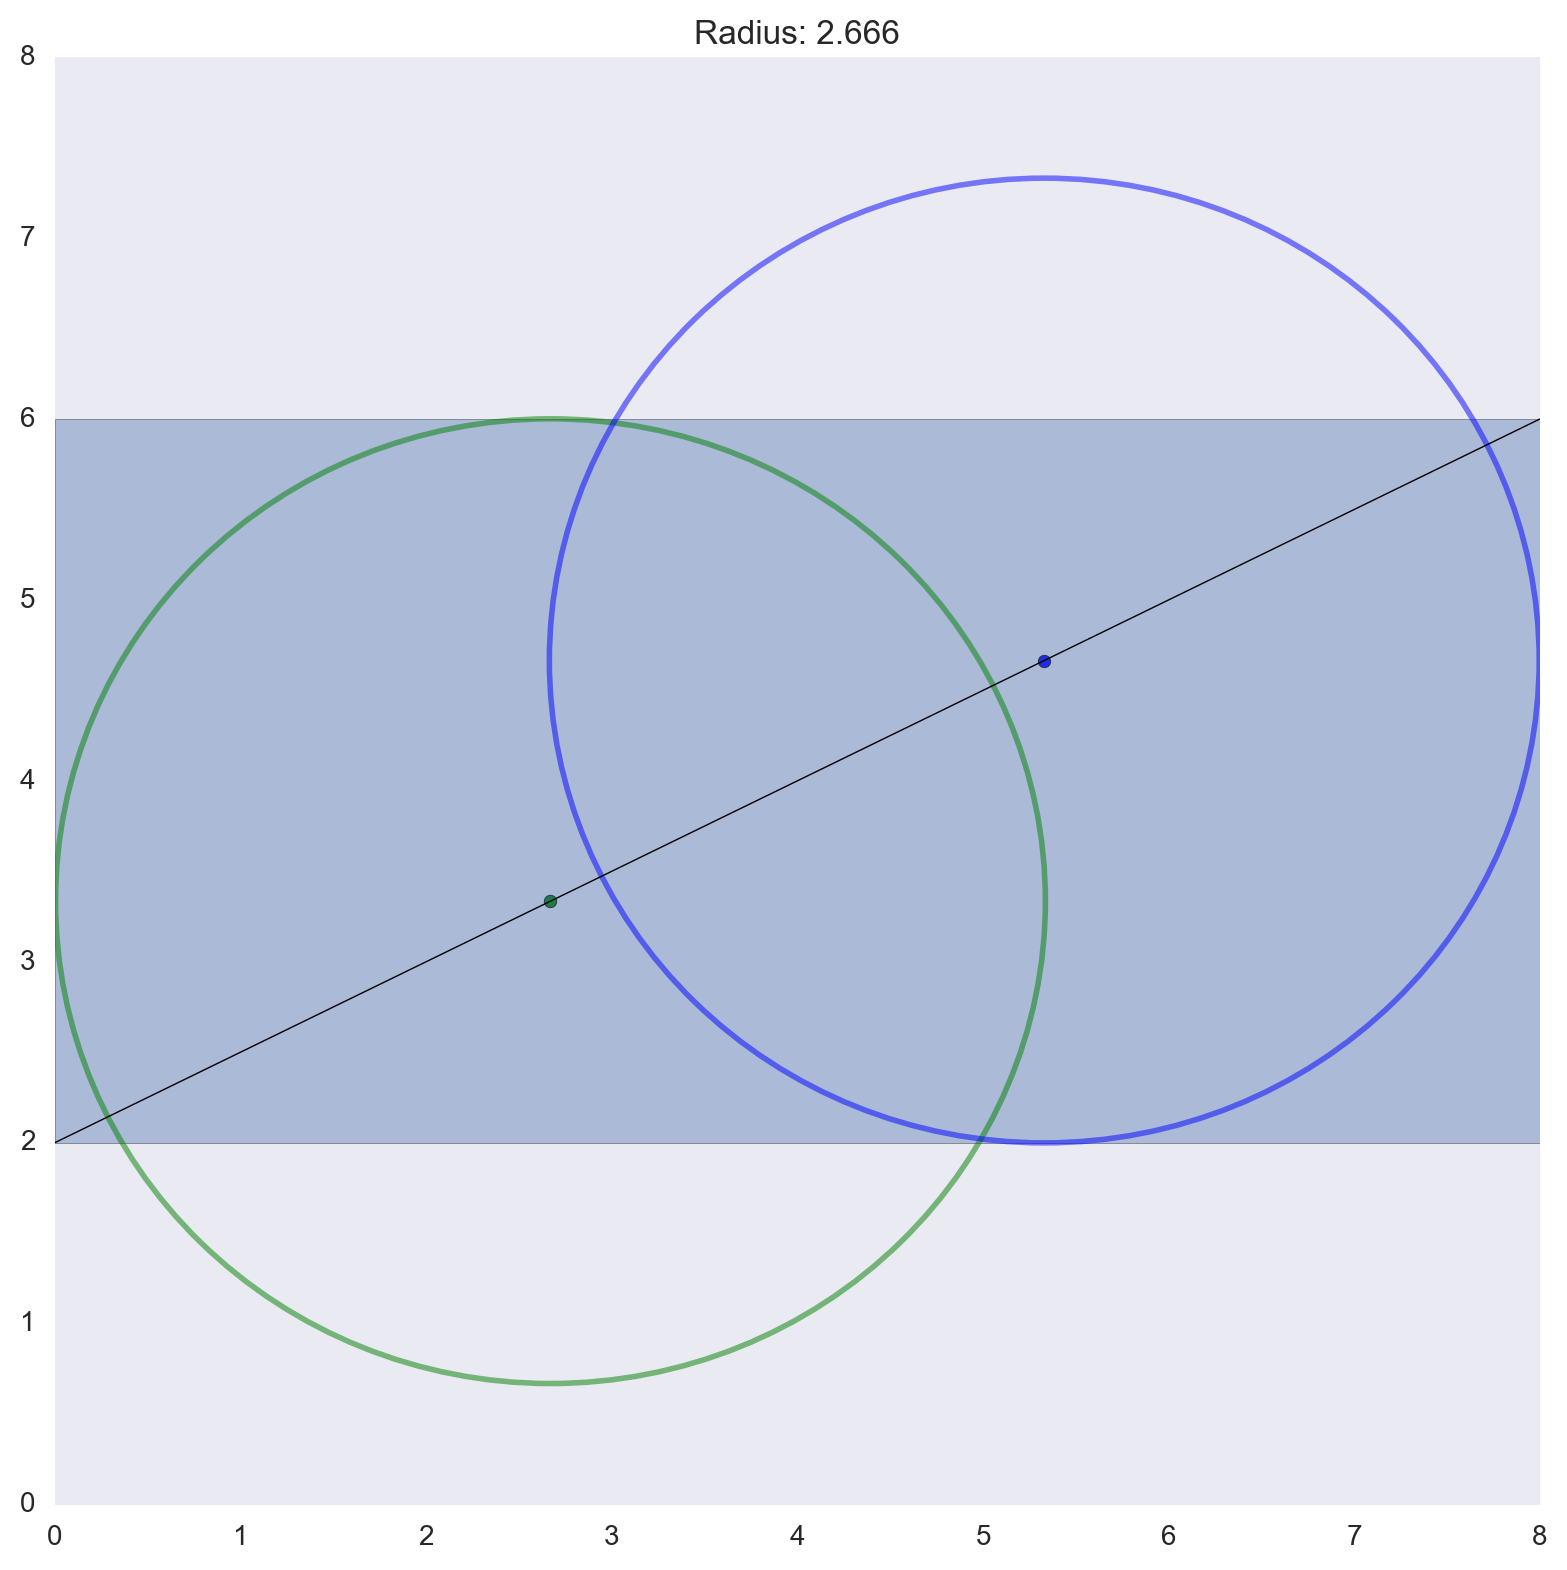

In [21]:
def plot_circles_diag(distance_from_center=1.33, radius=2.666):
    slope = 0.5
    intercept = 2.0
    fig=plt.figure(1)
    plt.axis([0,8,0,8])
    plt.grid(b=None, )
    ax=fig.add_subplot(1,1,1)
    rect = plt.Rectangle((0, 2), 8, 4, alpha=0.4)
    ax.add_patch(rect)
    plt.plot([0, 8], [2, 6], c='k', lw=0.5)
    center_1 = ((4 - distance_from_center), slope * (4 - distance_from_center) + intercept)
    center_2 = ((4 + distance_from_center), slope * (4 + distance_from_center) + intercept)
    plt.scatter(*center_1, c='g')
    plt.scatter(*center_2, c='b')
    circ=plt.Circle(center_1, radius=radius,
                    lw=2.0, color='g', alpha=0.5, fill=False,)
    ax.add_patch(circ)
    circ2=plt.Circle(center_2, radius=radius,
                    lw=2.0, color='b', alpha=0.5, fill=False,)
    ax.add_patch(circ2)
    ax.set_ylim(0, 8)
    ax.set_title("Radius: " + str(round(radius, 5)))
    fig.tight_layout()
    
plot_circles_diag()

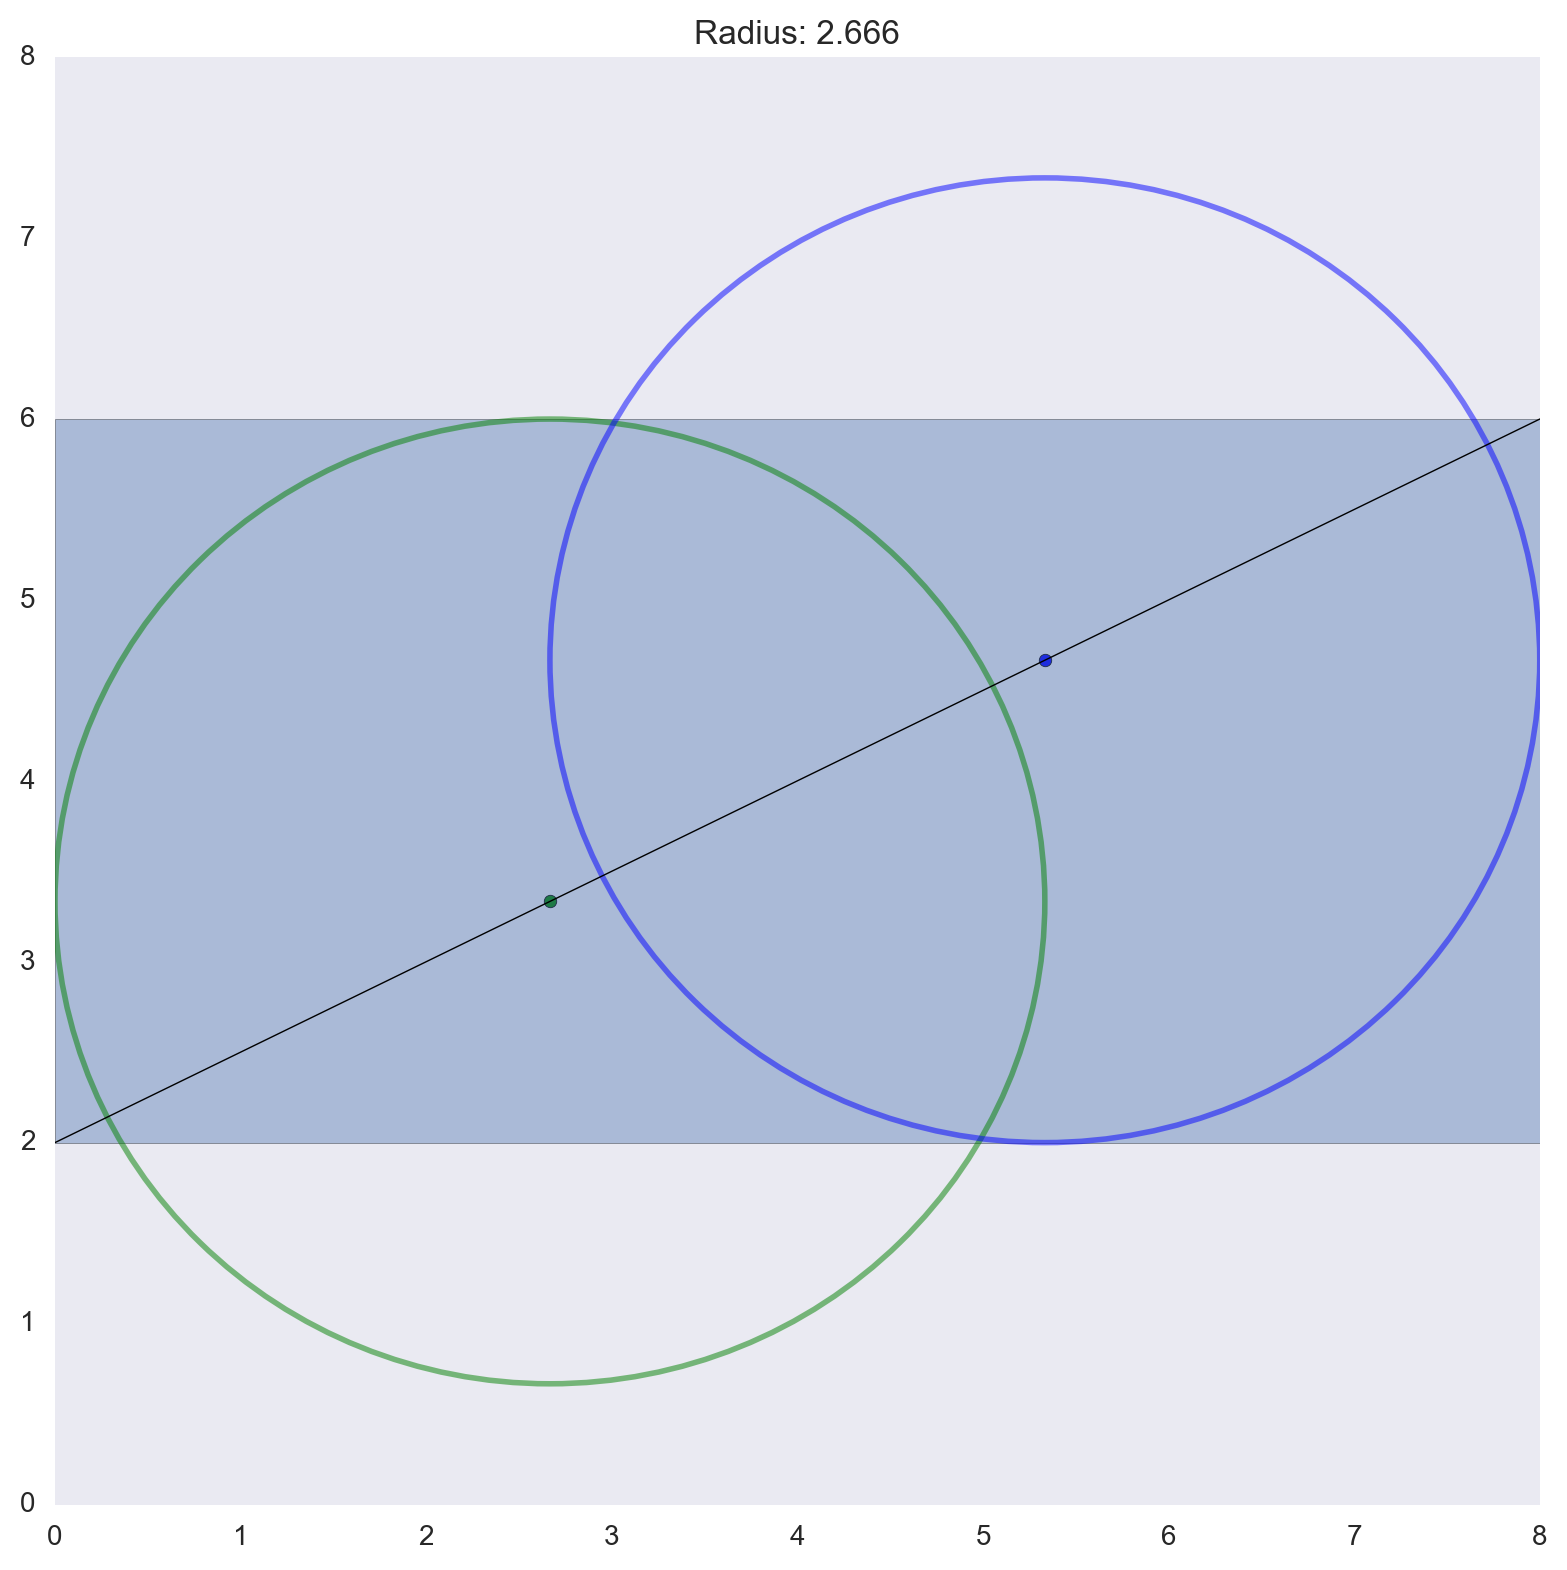

In [23]:
distance_slider = FloatSlider(value=1.333, min=1.310, max=1.50, step=0.01)
radius_slider = FloatSlider(value=2.666, min=2.5, max=3.0, step=0.01)
interactive(plot_circles_diag,
            radius=radius_slider,
            distance_from_center=distance_slider,
           )

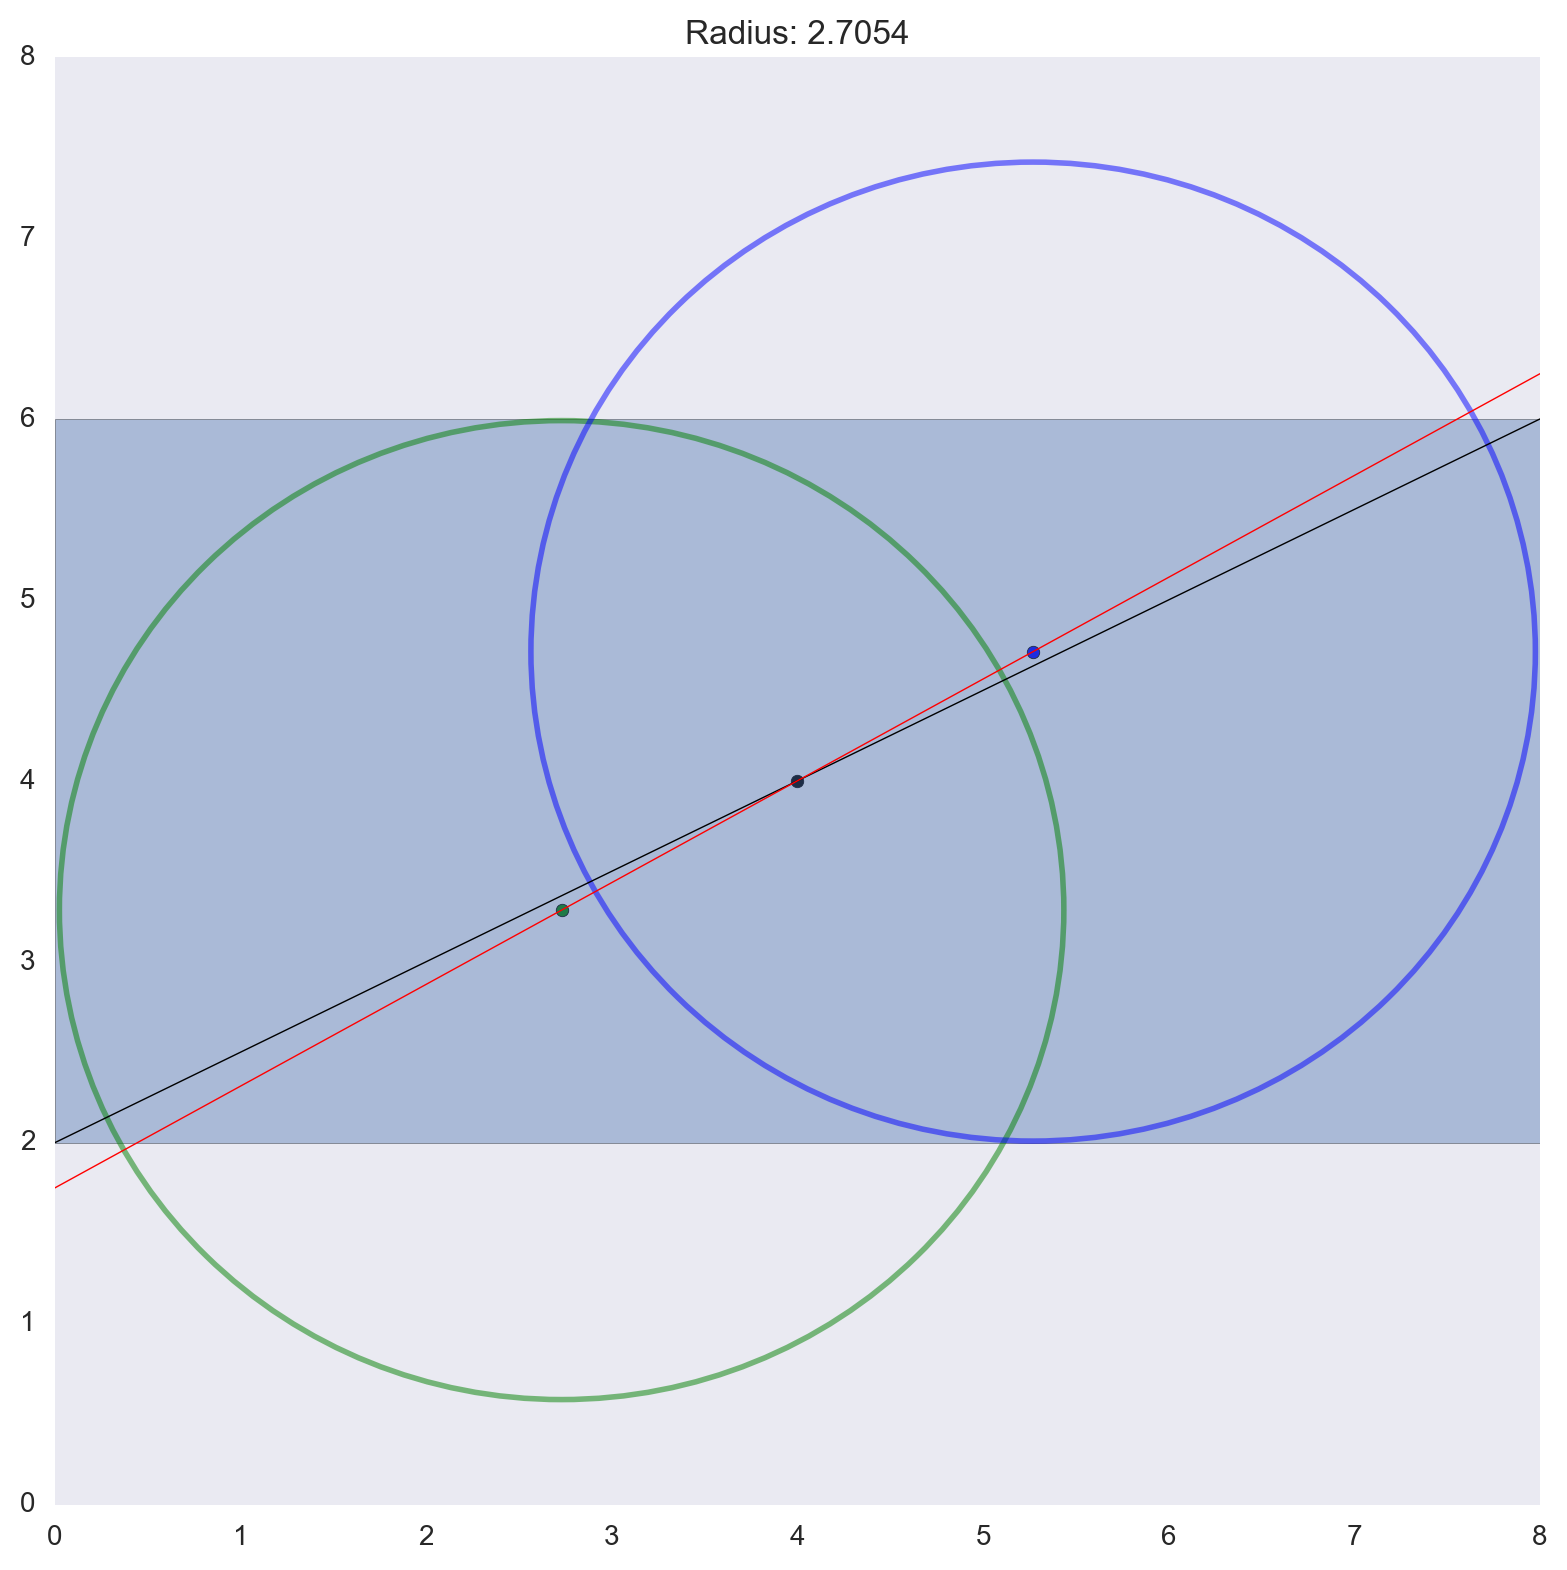

In [33]:
def plot_circles_offdiag(delta_y=0.10, distance_from_center=1.33, radius=2.666):
    slope = ((4) - (2 + delta_y))/(4.0)
    intercept = delta_y + 2.0
    fig=plt.figure(1)
    plt.axis([0,8,0,8])
    plt.grid(b=None, )
    ax=fig.add_subplot(1,1,1)
    rect = plt.Rectangle((0, 2), 8, 4, alpha=0.4)
    ax.add_patch(rect)
    # Add diagonal for reference
    plt.plot([0, 8], [2, 6], c='k', lw=0.5)
    plt.scatter(4, 4, c='k')
    plt.plot([0, 8], [0 * slope + intercept, 8 * slope + intercept], c='r', lw=0.5)
    center_1 = ((4 - distance_from_center), slope * (4 - distance_from_center) + intercept)
    center_2 = ((4 + distance_from_center), slope * (4 + distance_from_center) + intercept)
    
    plt.scatter(*center_1, c='g')
    plt.scatter(*center_2, c='b')

    circ=plt.Circle(center_1, radius=radius,
                    lw=2.0, color='g', alpha=0.5, fill=False,)
    ax.add_patch(circ)
    circ2=plt.Circle(center_2, radius=radius,
                    lw=2.0, color='b', alpha=0.5, fill=False,)
    ax.add_patch(circ2)
    circ2.fill(points[corners, 0], points[corners, 1], 'k',alpha=0.3)
    ax.set_ylim(0, 8)
    ax.set_title("Radius: " + str(round(radius, 5)))
    fig.tight_layout()
    
plot_circles_offdiag(delta_y=-0.25, distance_from_center=1.27, radius=2.7054)

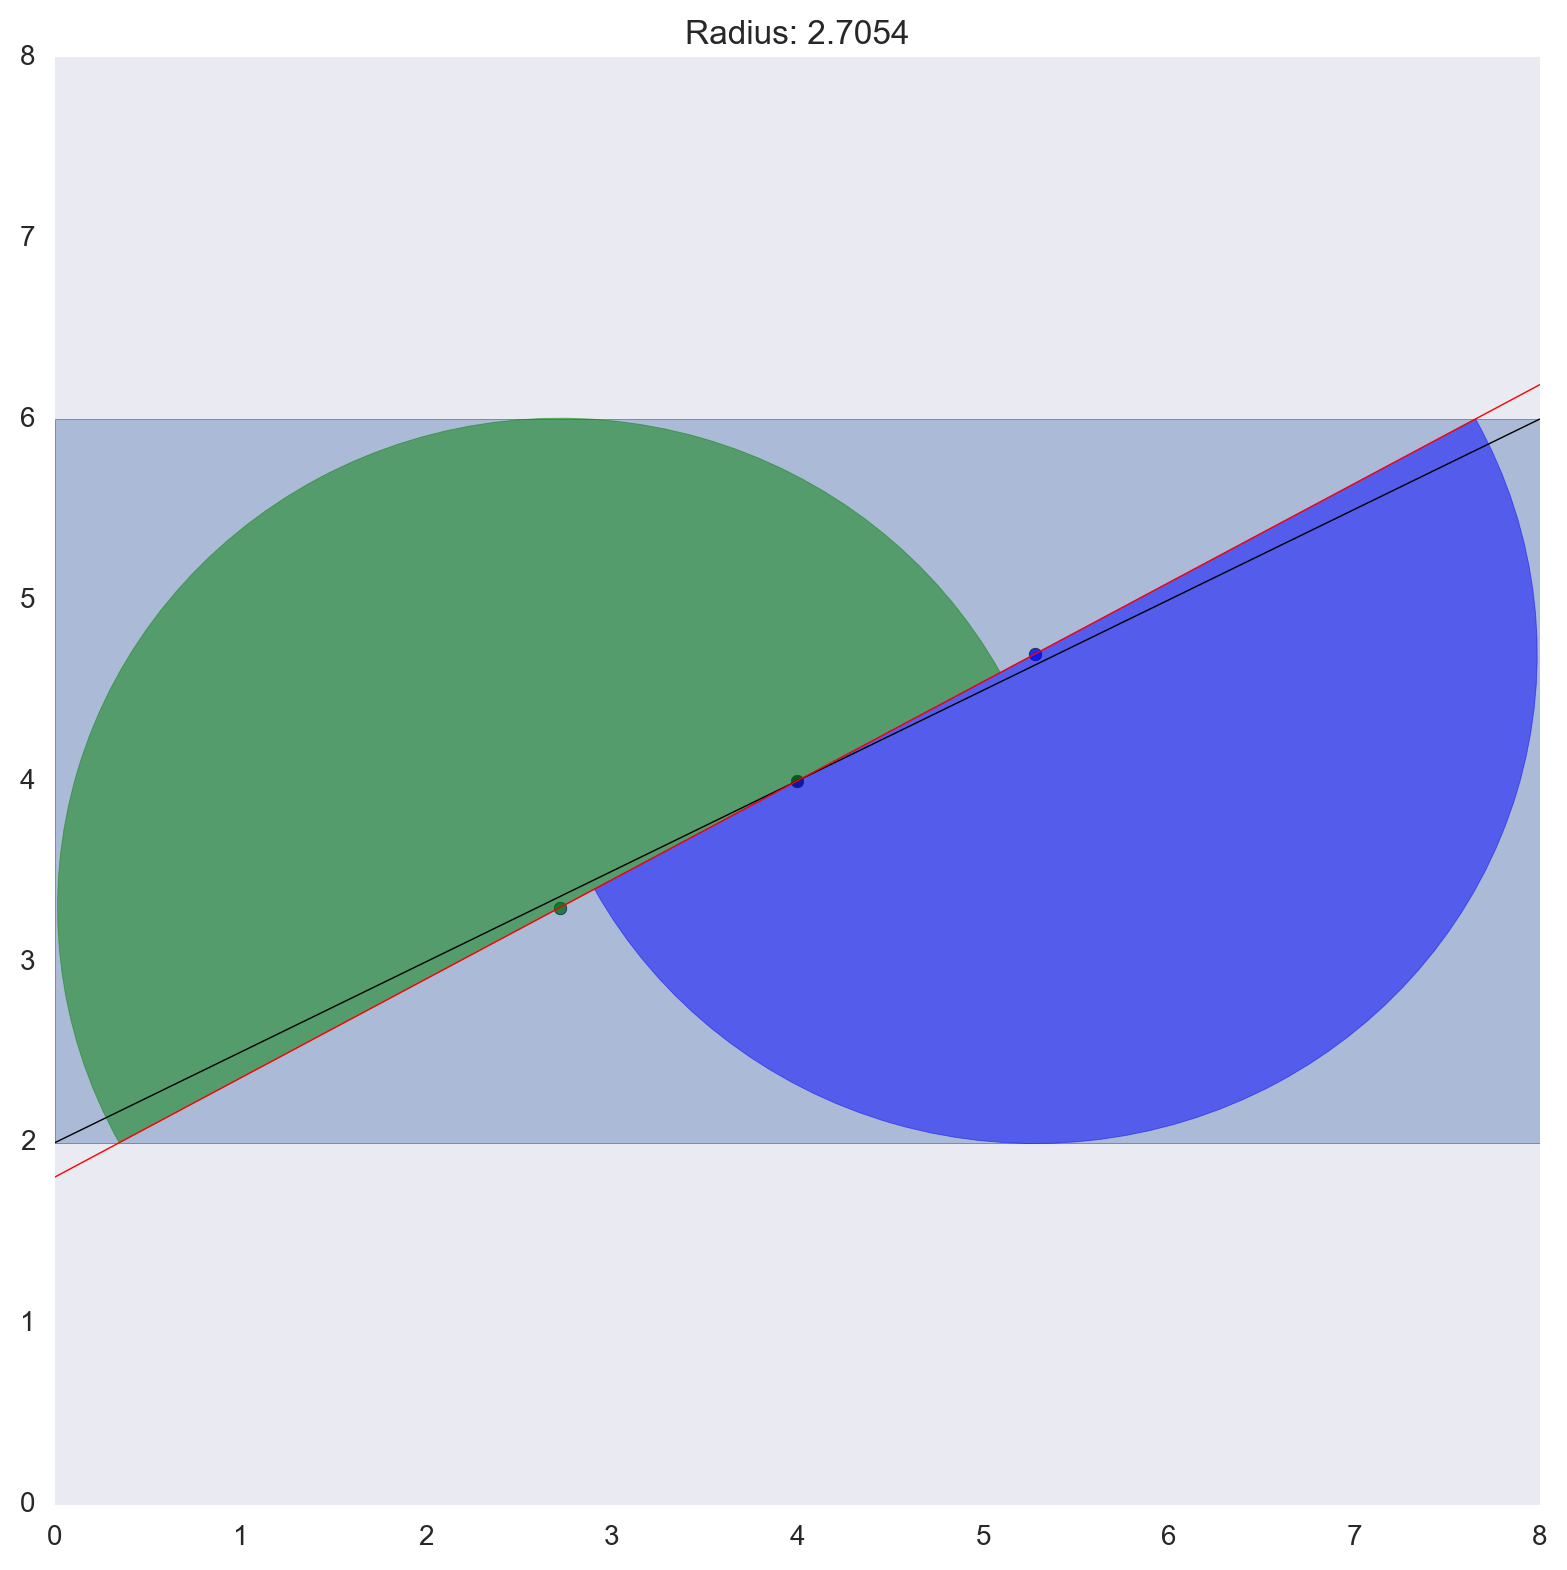

In [57]:
def plot_halfcircles_offdiag(delta_y=0.10, distance_from_center=1.33, radius=2.666):
    slope = ((4) - (2 + delta_y))/(4.0)
    intercept = delta_y + 2.0
    fig=plt.figure(1)
    plt.axis([0,8,0,8])
    plt.grid(b=None, )
    ax=fig.add_subplot(1,1,1)
    rect = plt.Rectangle((0, 2), 8, 4, alpha=0.4)
    ax.add_patch(rect)
    # Add diagonal for reference
    plt.plot([0, 8], [2, 6], c='k', lw=0.5)
    plt.scatter(4, 4, c='k')
    plt.plot([0, 8], [0 * slope + intercept, 8 * slope + intercept], c='r', lw=0.5)
    center_1 = ((4 - distance_from_center), slope * (4 - distance_from_center) + intercept)
    center_2 = ((4 + distance_from_center), slope * (4 + distance_from_center) + intercept)
    
    plt.scatter(*center_1, c='g')
    plt.scatter(*center_2, c='b')

    theta = np.rad2deg(np.arctan((2 - delta_y)/4.0))
    
    circ = Wedge(center_1, radius, 0 + theta, 180 + theta, fill=True, color='g', alpha=0.5)
    ax.add_patch(circ)
    circ2 = Wedge(center_2, radius, 180 + theta, 0 + theta, fill=True, color='b', alpha=0.5)
    ax.add_patch(circ2)
    ax.set_ylim(0, 8)
    ax.set_title("Radius: " + str(round(radius, 5)))
    fig.tight_layout()
    
plot_halfcircles_offdiag(delta_y=-0.19, distance_from_center=1.28, radius=2.7054)

# Interactive sliders

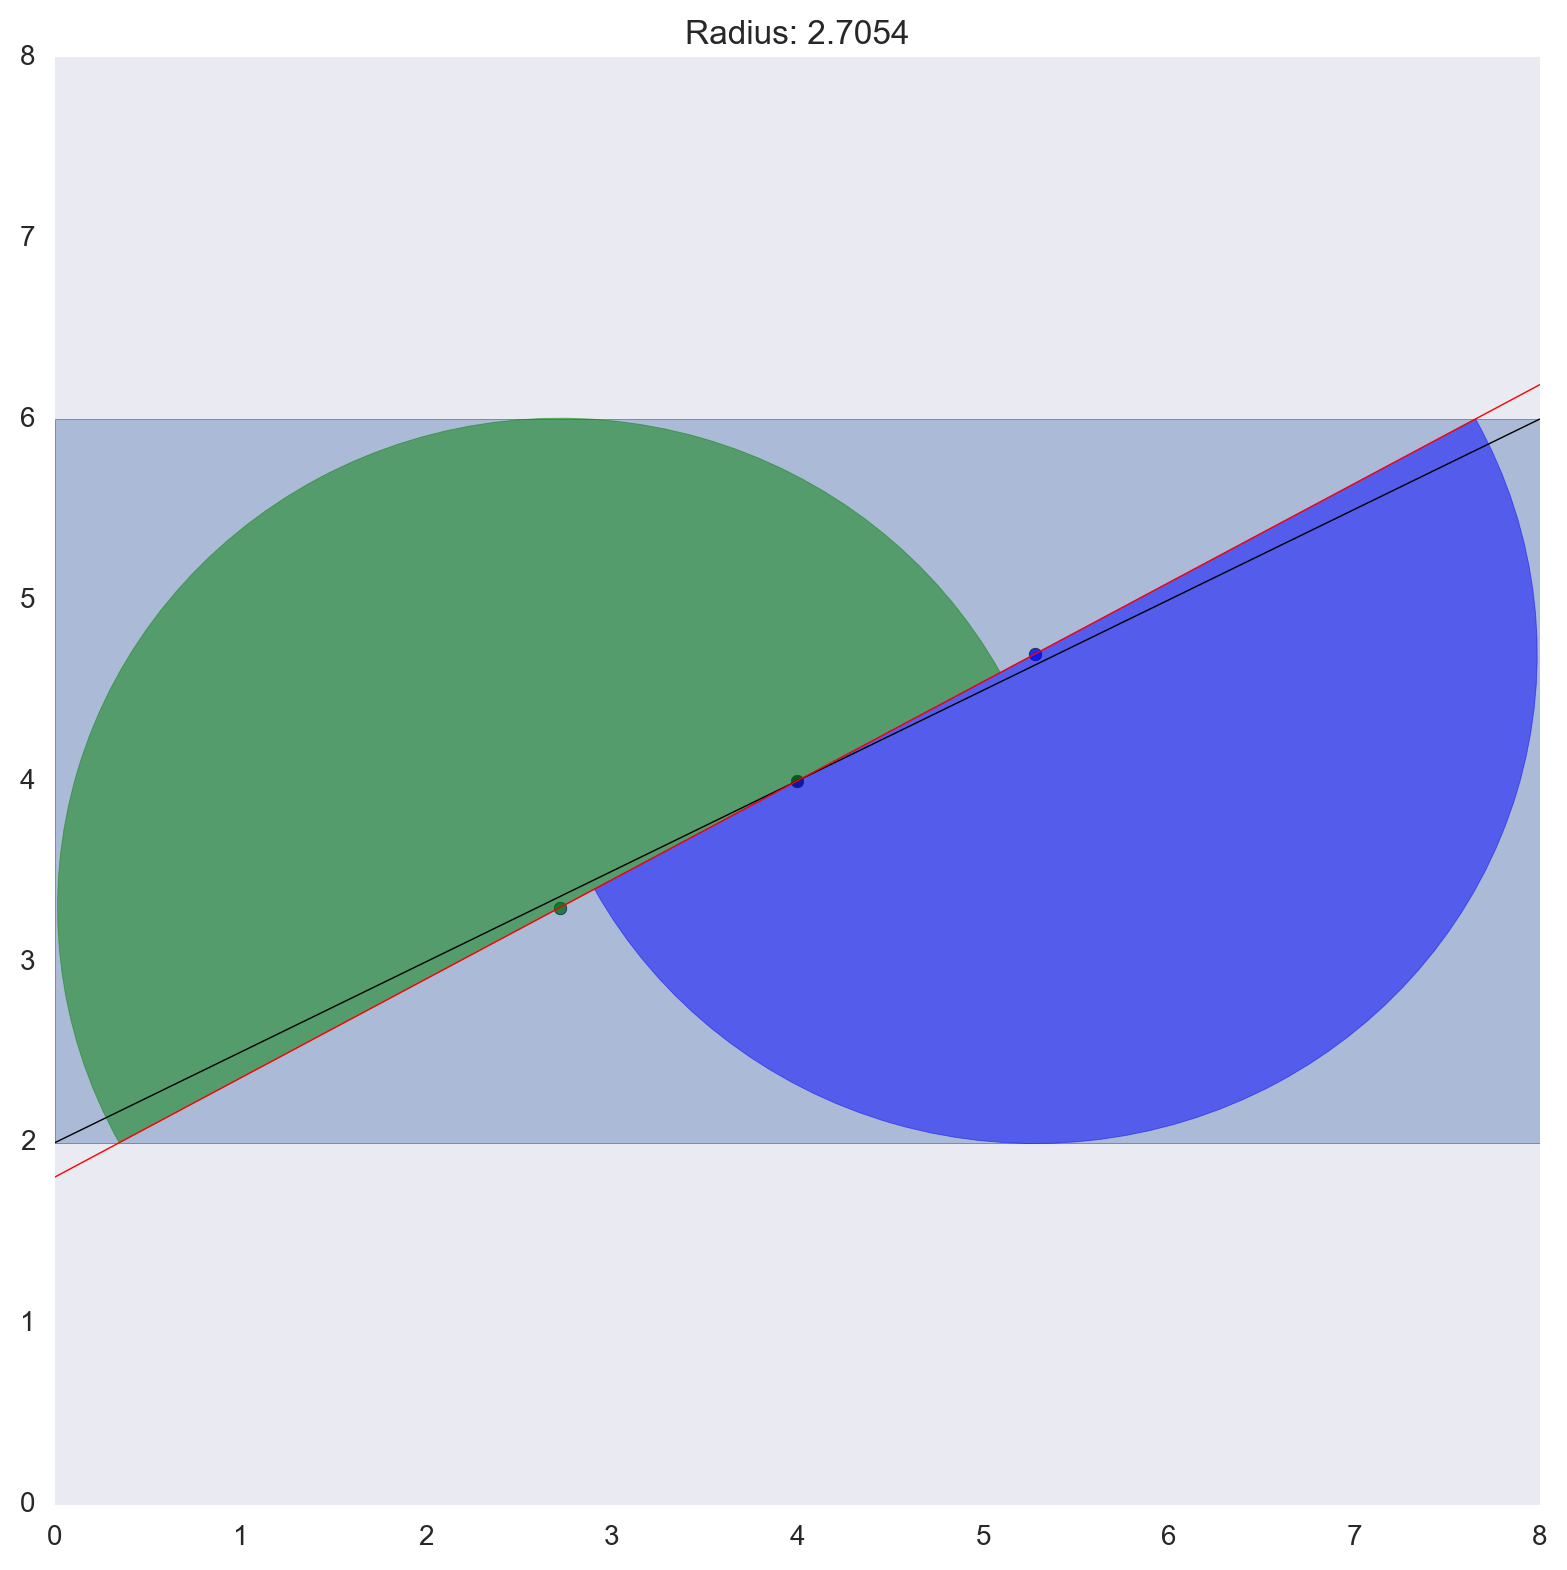

In [56]:
distance_slider = FloatSlider(value=1.28, min=0.310, max=1.50, step=0.01)
radius_slider = FloatSlider(value=2.7054, min=2.5, max=3.0, step=0.01)
offset_slider = FloatSlider(value=-0.19, min=-0.50, max=0.5, step=0.01)
interactive(plot_halfcircles_offdiag,
            radius=radius_slider,
            distance_from_center=distance_slider,
            delta_y=offset_slider,
           )